In [1]:
 import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

#Temperature and speed are input variables with 3 input descriptors
#and rainfall is output variable with 3 descriptors
temp = ctrl.Antecedent(np.arange(0, 11, 1), 'temp')
windspeed = ctrl.Antecedent(np.arange(0, 11, 1), 'windspeed')
rainfall = ctrl.Consequent(np.arange(0, 26, 1), 'rainfall')

# Auto-membership function 
temp.automf(3)
windspeed.automf(3)

# membership functions 
rainfall['low'] = fuzz.trimf(rainfall.universe, [0, 0, 13])
rainfall['medium'] = fuzz.trimf(rainfall.universe, [0, 13, 25])
rainfall['high'] = fuzz.trimf(rainfall.universe, [13, 25, 25])

E:\D Drive\IIIT\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


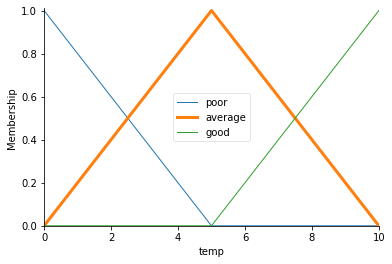

In [2]:
temp['average'].view()

E:\D Drive\IIIT\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


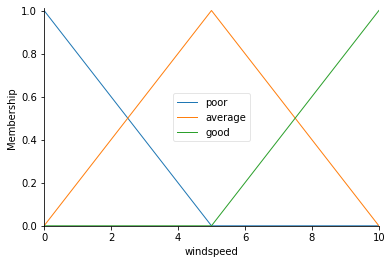

In [3]:
windspeed.view()

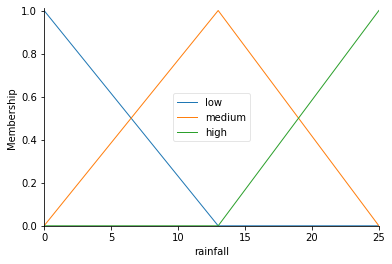

In [4]:
rainfall.view()

E:\D Drive\IIIT\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
E:\D Drive\IIIT\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2d56abc3408>)

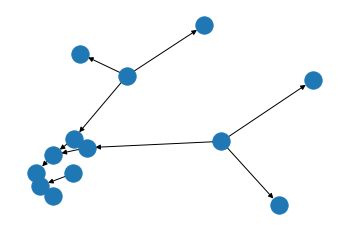

In [5]:

#rules can be formed as
rule1 = ctrl.Rule(temp['poor'] | windspeed['poor'], rainfall['low'])
rule2 = ctrl.Rule(temp['average'] | windspeed['average'], rainfall['medium'])
rule3 = ctrl.Rule(temp['good'] | windspeed['good'], rainfall['high'])

rule1.view()

In [6]:
rain_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In [7]:
rain = ctrl.ControlSystemSimulation(rain_ctrl)

In [8]:
#give the input values
rain.input['temp'] = 9
rain.input['windspeed'] = 9

# Crunch the numbers
rain.compute()

16.806387225548903


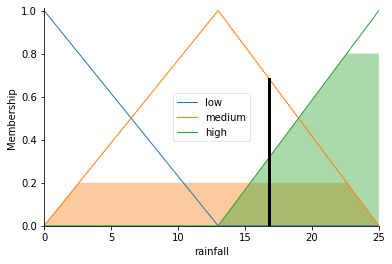

In [9]:
#output
print (rain.output['rainfall'])
(rainfall.view(sim=rain))